In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading data
df = pd.read_csv('examdata.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some college,standard,completed,82,76,81
1,female,group D,associate's degree,standard,completed,78,88,94
2,male,group D,high school,standard,none,65,63,67
3,male,group D,master's degree,free/reduced,none,55,66,57
4,female,group A,master's degree,free/reduced,none,59,80,74
...,...,...,...,...,...,...,...,...
995,male,group D,high school,standard,none,77,89,79
996,male,group C,high school,standard,none,71,68,62
997,female,group D,some high school,free/reduced,none,37,55,54
998,male,group C,some high school,free/reduced,completed,65,73,69


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
#Renaming columns that has whitespace
df.rename(columns={
    'parental level of education':'parental_education_level',
    'test preparation course':'test_preparation_course',
    'math score':'math_score',
    'reading score':'reading_score',
    'writing score':'writing_score'
},inplace=True)

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_education_level', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [9]:
df['gender'].nunique()

2

In [10]:
df['race/ethnicity'].unique()

array(['group C', 'group D', 'group A', 'group B', 'group E'],
      dtype=object)

In [11]:
print(df['parental_education_level'].unique())
df['parental_education_level'].nunique()

['some college' "associate's degree" 'high school' "master's degree"
 "bachelor's degree" 'some high school']


6

In [12]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [13]:
df['test_preparation_course'].unique()

array(['completed', 'none'], dtype=object)

In [14]:
df.dtypes

gender                      object
race/ethnicity              object
parental_education_level    object
lunch                       object
test_preparation_course     object
math_score                   int64
reading_score                int64
writing_score                int64
dtype: object

In [15]:
df.duplicated().sum()

0

# Time to answer the questions in the case study

In [16]:
#Number of students that partake in the exam
print('The total number of students that partake in the exam is:',
      len(df['gender']))

The total number of students that partake in the exam is: 1000


In [17]:
#Number of male students
male = df[df['gender']=='male']
len_male = len(male['gender'])
print('The number of male students is:',
     len(male['gender']))

The number of male students is: 516


In [18]:
female = df[df['gender']=='female']
len_female = len(female['gender'])
print('The number of female students is :',
     len_female)

The number of female students is : 484


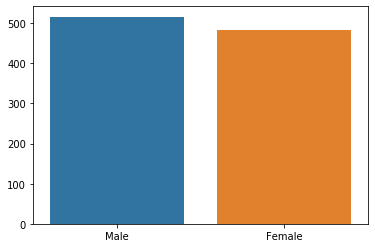

In [19]:
sns.barplot(x=['Male','Female'],y=[len_male,len_female])

In [20]:
gender = df.pivot_table(index='gender',
                       values=['math_score','reading_score','writing_score'],
                       aggfunc='mean')

In [21]:
gender

,math_score,reading_score,writing_score
gender,,,
female,64.838843,73.56405,73.392562
male,68.998062,66.00000,63.899225


Text(0, 0.5, 'Score')

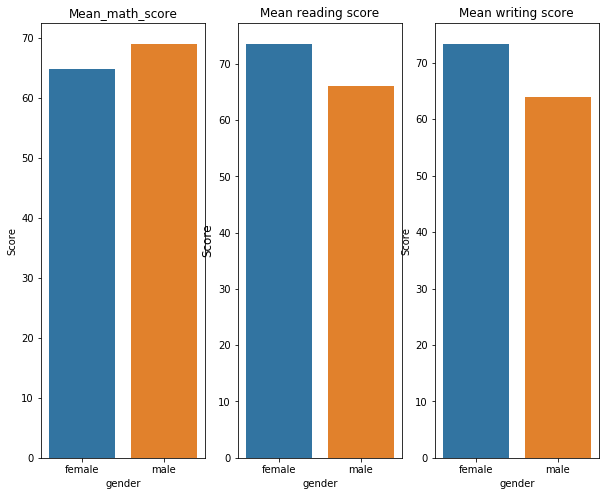

In [22]:
plt.figure(figsize=[10,8])
plt.subplot(1,3,1)
sns.barplot(x=gender.index,
       y=gender.math_score)
plt.title('Mean_math_score')
plt.ylabel('Score')
plt.subplot(1,3,2)
sns.barplot(x=gender.index,
           y=gender.reading_score)
plt.ylabel('Score', size='large')
plt.title('Mean reading score')
plt.subplot(1,3,3)
sns.barplot(x=gender.index,
           y=gender.writing_score)
plt.title('Mean writing score')
plt.ylabel('Score')

We've taken a look at the number of male and female students that sat for the exam and checked the average score for each test per gender. Now let's take a look at the race/ethnicity

In [23]:
new_df = pd.DataFrame(columns=['race/ethnicity','total_students'])
for value in df['race/ethnicity'].unique():
    query = df[df['race/ethnicity']==value]
    new_df = new_df.append({'race/ethnicity':value,
                           'total_students':len(query['race/ethnicity'])},
                          ignore_index=True)

In [24]:
new_df

,race/ethnicity,total_students
0,group C,328
1,group D,247
2,group A,84
3,group B,199
4,group E,142


Text(0, 0.5, 'Number of students')

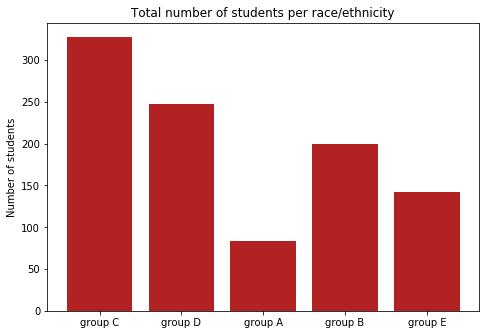

In [25]:
fig = plt.figure()
plot1 = fig.add_axes([0,0,1,1])
plot1.bar(new_df['race/ethnicity'],
        new_df['total_students'],
        color='firebrick')
plot1.set_title('Total number of students per race/ethnicity')
plot1.set_ylabel('Number of students')

This is the number of students per race/ethnicity , let's check the average score of an exam per ethnicity

In [26]:
race = df.pivot_table(index='race/ethnicity',
                     values=['math_score','reading_score','writing_score'],
                     aggfunc='mean')
race

,math_score,reading_score,writing_score
race/ethnicity,,,
group A,62.047619,66.738095,64.642857
group B,63.020101,66.914573,65.030151
group C,65.780488,68.414634,66.990854
group D,68.097166,71.453441,71.789474
group E,76.309859,75.000000,73.366197


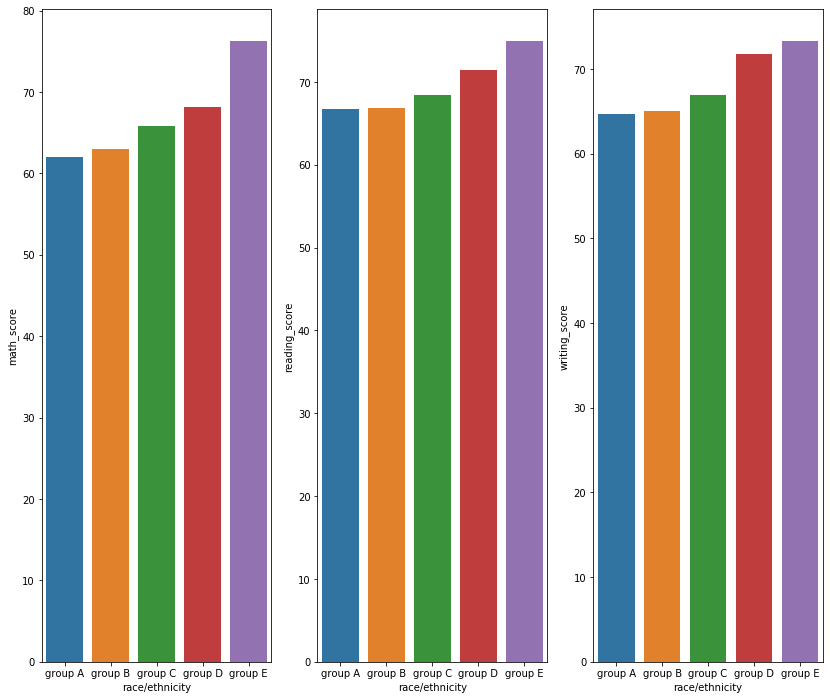

In [27]:
plt.figure(figsize=[14,12])
for a in range(3):
    plt.subplot(1,3,a+1)
    sns.barplot(x=race.index,
               y=race.iloc[:,a])

From this figure, we could see that Group E has the highest mean score for all the tests.This shows how excellence students from Group R are.

# Time to look at the top 10 Students in each test

In [28]:
top10_math = df.nlargest(10, 'math_score')
top10_reading = df.nlargest(10, 'reading_score')
top10_writing = df.nlargest(10, 'writing_score')

In [29]:
print('The top 10 students in math are : ')
top10_math.loc[:, ['gender','race/ethnicity','parental_education_level','math_score']]

The top 10 students in math are : 


,gender,race/ethnicity,parental_education_level,math_score
62,female,group C,bachelor's degree,100
99,male,group A,bachelor's degree,100
222,male,group E,some high school,100
311,male,group D,associate's degree,100
329,male,group E,some college,100
350,female,group E,some college,100
460,female,group E,some college,100
505,male,group E,associate's degree,100
606,male,group E,high school,100
804,male,group C,bachelor's degree,100


In [30]:
print('The top 10 students in reading are as follows : ')
top10_reading.loc[:, ['gender','race/ethnicity','parental_education_level','reading_score']]

The top 10 students in reading are as follows : 


,gender,race/ethnicity,parental_education_level,reading_score
62,female,group C,bachelor's degree,100
105,female,group B,some college,100
168,male,group D,master's degree,100
299,female,group D,high school,100
350,female,group E,some college,100
446,female,group C,master's degree,100
460,female,group E,some college,100
579,female,group B,high school,100
666,female,group D,associate's degree,100
702,female,group B,associate's degree,100


In [31]:
print('The top 10 students in writing are as follows : ')
top10_writing.loc[:, ['gender','race/ethnicity','parental_education_level','writing_score']]

The top 10 students in writing are as follows : 


,gender,race/ethnicity,parental_education_level,writing_score
62,female,group C,bachelor's degree,100
99,male,group A,bachelor's degree,100
105,female,group B,some college,100
168,male,group D,master's degree,100
195,female,group D,some college,100
241,female,group D,high school,100
261,female,group D,master's degree,100
280,female,group D,some college,100
299,female,group D,high school,100
350,female,group E,some college,100


We've taken a look at the top 10 students in each test so far. We can take this a step further by checking the correlation between the top 10 students scores for each test which their scores in other tests.

In [32]:
top10_math['math_score'] = top10_math['math_score'].astype('float')
top10_math2 = top10_math.iloc[:,-2:].astype('float')

In [33]:
top10_math2.corr()

,reading_score,writing_score
reading_score,1.00000,0.93126
writing_score,0.93126,1.00000


In [34]:
top10_reading2 = top10_reading.iloc[:, [-3,-1]].astype('float')
top10_reading2.corr()

,math_score,writing_score
math_score,1.00000,-0.07335
writing_score,-0.07335,1.00000


In [35]:
top10_writing2 = top10_writing.iloc[:, [-3,-2]].astype('float')
top10_writing2.corr()

,math_score,reading_score
math_score,1.000000,0.111467
reading_score,0.111467,1.000000


# Does parental education level affect performance of student?

In [36]:
df['parental_education_level'].unique()

array(['some college', "associate's degree", 'high school',
       "master's degree", "bachelor's degree", 'some high school'],
      dtype=object)

In [37]:
pet = df.pivot_table(index='parental_education_level',
                    values=['math_score','reading_score','writing_score'],
                    aggfunc='mean')
pet

,math_score,reading_score,writing_score
parental_education_level,,,
associate's degree,67.764045,70.713483,69.533708
bachelor's degree,71.915094,74.839623,74.424528
high school,63.982063,66.730942,65.031390
master's degree,71.423913,73.771739,74.315217
some college,68.196262,71.313084,70.406542
some high school,63.459893,65.304813,63.219251


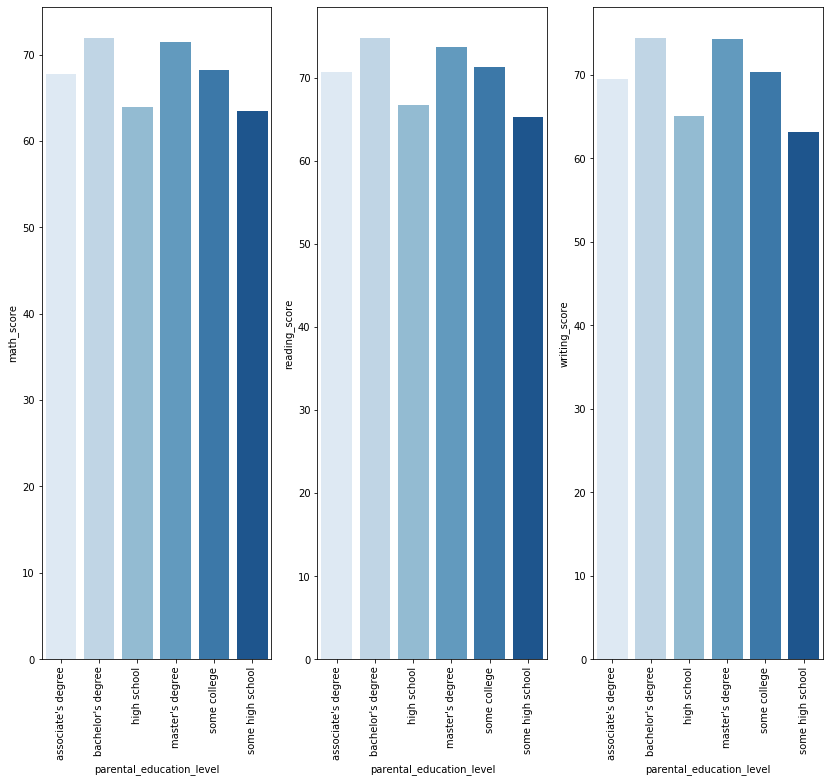

In [38]:
plt.figure(figsize=[14,12])
for a in range(3):
    plt.subplot(1,3,a+1)
    sns.barplot(x=pet.index,
                   y=pet.iloc[:,a],
               palette='Blues')
    plt.xticks(rotation=90)

From this we can see the mean of the performances of students for each tests in respect to the parental level of education. From the figyure, we can see that students whose their parental level of education is bachelor;s degree and master's degree really performed well more than the students whose parental level of education is assosiate's degree., so it's okay to say that parental level of education has a liitle influence in student performance

# What kind of lunch can student afford the most?

In [39]:
lunch_df = pd.DataFrame(columns=['lunch','total_student'])
for value in df['lunch'].unique():
    query = df[df['lunch']==value]
    lunch_df = lunch_df.append({'lunch':value,
                               'total_student':len(query['lunch'])},
                              ignore_index=True)

In [40]:
lunch_df

,lunch,total_student
0,standard,659
1,free/reduced,341


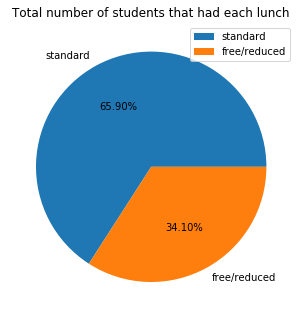

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(lunch_df['total_student'],
      labels=list(lunch_df['lunch']),
      autopct='%1.2f%%')
plt.title('Total number of students that had each lunch')
plt.legend(['standard','free/reduced'])
plt.show()

The lunch students could afford the most is standard lunch

# Correlation between student prepartion and high test scores

In [42]:
#Take a look at the top 40 math scores
top = df.loc[:,['test_preparation_course','math_score']].sort_values('math_score',ascending=False)
top40m = top.iloc[:41, :]
#top40 in reading
top = df.loc[:,['test_preparation_course','reading_score']].sort_values('reading_score',ascending=False)
top40_reading = top.iloc[:41, :]
#top40 in writing
top = df.loc[:,['test_preparation_course','writing_score']].sort_values('writing_score',ascending=False)
top40_writing = top.iloc[:41, :]

In [43]:
print('Top 40 in math are :')
top40m

Top 40 in math are :


,test_preparation_course,math_score
460,none,100
311,completed,100
350,completed,100
222,completed,100
964,none,100
966,completed,100
62,completed,100
606,completed,100
804,none,100
99,completed,100


In [44]:
print('Top 40 in reading are ')
top40_reading

Top 40 in reading are 


,test_preparation_course,reading_score
460,none,100
702,completed,100
731,completed,100
666,completed,100
62,completed,100
940,none,100
942,none,100
350,completed,100
168,completed,100
579,completed,100


In [45]:
print('Top 40 in writing are')
top40_writing

Top 40 in writing are


,test_preparation_course,writing_score
299,none,100
731,completed,100
280,none,100
168,completed,100
105,completed,100
99,completed,100
507,completed,100
702,completed,100
350,completed,100
241,completed,100


In [46]:
def query(dataname):
    new_df_name = pd.DataFrame(columns=['preparation status','no of students'])
    for val in dataname['test_preparation_course'].unique():
        unique_query = dataname[dataname['test_preparation_course']==val]
        new_df_name = new_df_name.append({'preparation status':val,
                                         'no of students':len(unique_query['test_preparation_course'])},
                                        ignore_index=True)
    return new_df_name

In [47]:
top40_math = query(top40m)
top_reading = query(top40_reading)
top_writing = query(top40_writing)

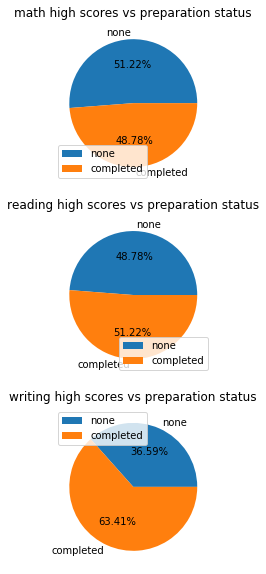

In [48]:
plt.figure(figsize=[12,10])
plt.subplot(3,1,1)
plt.pie(top40_math['no of students'], labels=top40_math['preparation status'], autopct='%1.2f%%')
plt.title('math high scores vs preparation status')
plt.legend(['none','completed'], loc='lower left')
plt.subplot(3,1,2)
plt.pie(top_reading['no of students'], labels=top_reading['preparation status'], autopct='%1.2f%%')
plt.title('reading high scores vs preparation status')
plt.legend(['none','completed'], loc='lower right')
plt.subplot(3,1,3)
plt.pie(top_writing['no of students'], labels=top_writing['preparation status'], autopct='%1.2f%%')
plt.title('writing high scores vs preparation status')
plt.legend(['none','completed'], loc='upper left')
plt.show()

# Most student prepare for exam?

In [49]:
query_df = pd.DataFrame(columns=['test_preparation_course','Number_of_students'])
for val in df['test_preparation_course'].unique():
    query = df[df['test_preparation_course']==val]
    query_df = query_df.append({'test_preparation_course':val,
                               'Number_of_students':len(query['test_preparation_course'])},
                              ignore_index=True)

In [50]:
query_df

,test_preparation_course,Number_of_students
0,completed,350
1,none,650


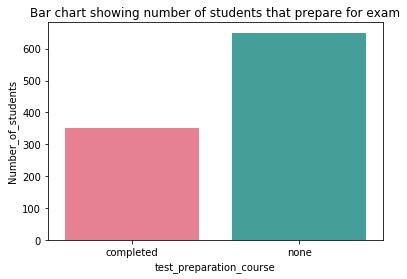

In [51]:
fig, ax = plt.subplots()
ax = sns.barplot(x=query_df['test_preparation_course'],
                y=query_df['Number_of_students'],
                palette='husl')
ax.set_title('Bar chart showing number of students that prepare for exam')
plt.show()

# Does parental level of education has anything to do with lunch?


In [60]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [61]:
df.parental_education_level.unique()

array(['some college', "associate's degree", 'high school',
       "master's degree", "bachelor's degree", 'some high school'],
      dtype=object)

In [78]:
lunch_standard = df[df['lunch']=='standard']
parent_standard_df = pd.DataFrame(columns=['parental_education_level','Students_number'])
for value in df.parental_education_level.unique():
    print('\nThe number of students whose their parent level of education is ',
         value,
         ' that had standard food are ')
    parent_standard = lunch_standard[lunch_standard['parental_education_level']==value]
    print(value, len(parent_standard['lunch']), 'Students')
    #Let's provide a dataframe for more understanding
    parent_standard_df = parent_standard_df.append({'parental_education_level':value,
                                                   'Students_number':len(parent_standard['lunch'])},
                                                  ignore_index=True)
    parent_standard_df['Students_number'] = parent_standard_df['Students_number'].astype('int')


The number of students whose their parent level of education is  some college  that had standard food are 
some college 138 Students

The number of students whose their parent level of education is  associate's degree  that had standard food are 
associate's degree 125 Students

The number of students whose their parent level of education is  high school  that had standard food are 
high school 133 Students

The number of students whose their parent level of education is  master's degree  that had standard food are 
master's degree 58 Students

The number of students whose their parent level of education is  bachelor's degree  that had standard food are 
bachelor's degree 73 Students

The number of students whose their parent level of education is  some high school  that had standard food are 
some high school 132 Students


In [83]:
print('Number of Students that had standard lunch with the respective parental level of education ')
parent_standard_df

Number of Students that had standard lunch with the respective parental level of education 


,parental_education_level,Students_number
0,some college,138
1,associate's degree,125
2,high school,133
3,master's degree,58
4,bachelor's degree,73
5,some high school,132


In [84]:
#Now let's look at free/reduced meal
free_lunch = df[df['lunch']=='free/reduced']
free_df = pd.DataFrame(columns=['parental_education_level','Students_number'])
for value in df.parental_education_level.unique():
    try:
        parent_free = free_lunch[free_lunch['parental_education_level']==value]
        free_df = free_df.append({'parental_education_level':value,
                                                   'Students_number':len(parent_free['lunch'])},
                                                  ignore_index=True)
        free_df['Students_number'] = free_df['Students_number'].astype('int') 
    except:
        print('No students whose their parental education level is ', value, ' that had free lunch')

In [85]:
print('Number of Students that had free lunch with the respective parental level of education ')
free_df

Number of Students that had free lunch with the respective parental level of education 


,parental_education_level,Students_number
0,some college,76
1,associate's degree,53
2,high school,90
3,master's degree,34
4,bachelor's degree,33
5,some high school,55


Looking at the two dataframes we could see that the parental level of education has nothing to do with the lunch.

# Does lunch has anything to do the the student preparation?

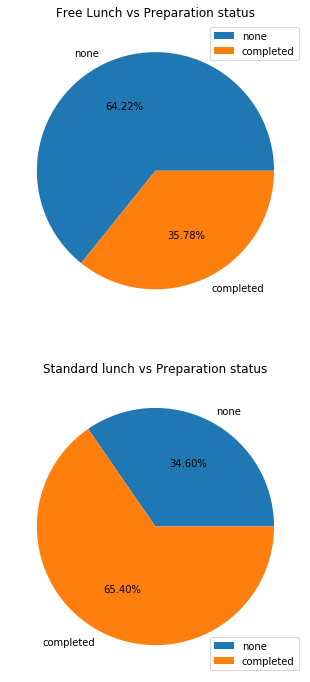

In [106]:
plt.figure(figsize=[14,12])
free_lunch2 = df[df['lunch']=='free/reduced']
list_df = pd.DataFrame(columns=['test_preparation_course','student_no'])
for value in free_lunch2['test_preparation_course'].unique():
    query = free_lunch2[free_lunch2['test_preparation_course']==value]
    list_df = list_df.append({'test_preparation_course':value,
                             'student_no':len(query['test_preparation_course'])},
                            ignore_index=True)
plt.subplot(2,1,1)
plt.pie(list_df['student_no'],
       labels=list_df['test_preparation_course'],
       autopct='%1.2f%%')
plt.title('Free Lunch vs Preparation status')
plt.legend(['none','completed'])
free_lunch3 = df[df['lunch']=='standard']
list_df2 = pd.DataFrame(columns=['test_preparation_course','student_no'])
for value in free_lunch3['test_preparation_course'].unique():
    query = free_lunch3[free_lunch3['test_preparation_course']==value]
    list_df2 = list_df2.append({'test_preparation_course':value,
                             'student_no':len(query['test_preparation_course'])},
                            ignore_index=True)
plt.subplot(2,1,2)
plt.pie(list_df2['student_no'],
       labels=list_df['test_preparation_course'],
       autopct='%1.2f%%')
plt.title('Standard lunch vs Preparation status')
plt.legend(['none','completed'], loc='lower right')
plt.show()

From this , we could see that most of the students that had free/reduced lunch did not prepare for the test and most of the students that had standard lunch completed the preparation for the test. So therefore,  lunch has something to do with the students preparation.